In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import seaborn as sns
import string


stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
tweet_df = pd.read_csv('twitter.csv')

In [3]:
tweet_df['labels'] = tweet_df['class'].map({0: "hate speech detected", 1: "offensive language detected", 2: "No hate and offensive speech"})

In [4]:
print(tweet_df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No hate and offensive speech  
1   offensive language detected  
2   offensive language detected  
3   offensive language detected  
4   offensive language detected  


In [5]:
tweet_df = tweet_df[['tweet', 'labels']]
tweet_df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offensive speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language detected


In [6]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   labels  24783 non-null  object
dtypes: object(2)
memory usage: 387.4+ KB


In [1]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    text = ' '.join([stemmer.stem(word) for word in text.split(' ')])
    return text
tweet_df['tweet'] = tweet_df['tweet'].apply(clean)

NameError: name 'tweet_df' is not defined

In [8]:
# printing random tweets to check the effect of processing
print(tweet_df.head())

                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                         labels  
0  No hate and offensive speech  
1   offensive language detected  
2   offensive language detected  
3   offensive language detected  
4   offensive language detected  


In [9]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   labels  24783 non-null  object
dtypes: object(2)
memory usage: 387.4+ KB


In [10]:
tweet_df['labels'].value_counts() 
#no. of users id who are using abusive languages in comments

offensive language detected     19190
No hate and offensive speech     4163
hate speech detected             1430
Name: labels, dtype: int64

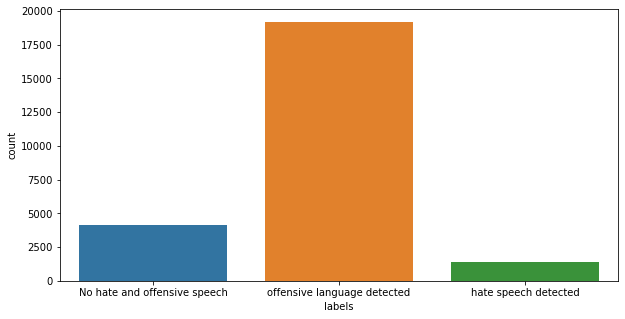

In [12]:
import matplotlib.pyplot as plt

# Assuming tweet_df is your DataFrame containing the data
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='labels', data=tweet_df)

# Save the plot as SVG image
plt.savefig('fig1.svg')

# Show the plot (optional)
plt.show()


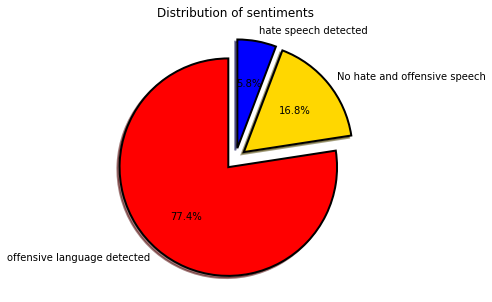

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))
colors = ("red", "gold", "blue")
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = tweet_df['labels'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90,
           wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiments')

# Save the plot as SVG image
plt.savefig('pie_chart.svg')


In [14]:
cv = CountVectorizer()
x = cv.fit_transform(tweet_df["tweet"])
y = tweet_df["labels"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
accuracy = clf.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.14%


In [22]:
test_data = "amazing work"
df = cv.transform([test_data])
print(clf.predict(df))

['No hate and offensive speech']


In [25]:
test_data = "black nigga"
df = cv.transform([test_data])
print(clf.predict(df))

['offensive language detected']


In [18]:
test_data = "you are son of a bitch"
df = cv.transform([test_data])
print(clf.predict(df))

['offensive language detected']


In [24]:
test_data = "i want to kill you"
df = cv.transform([test_data])
print(clf.predict(df))

['offensive language detected']


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


Accuracy: 89.14%
Precision: 87.91%
Recall: 89.14%
F1 Score: 88.24%


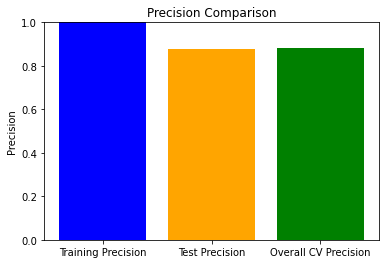

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import cross_val_score

# Calculate precision on training set
y_train_pred = clf.predict(x_train)
train_precision = precision_score(y_train, y_train_pred, average='weighted')

# Calculate precision on test set
y_test_pred = clf.predict(x_test)
test_precision = precision_score(y_test, y_test_pred, average='weighted')

# Calculate overall precision using cross-validation
cv_precision = cross_val_score(clf, x, y, cv=5, scoring=make_scorer(precision_score, average='weighted')).mean()

# Data for plotting
labels = ['Training Precision', 'Test Precision', 'Overall CV Precision']
precisions = [train_precision, test_precision, cv_precision]

# Plotting
plt.bar(labels, precisions, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.show()
